<a href="https://colab.research.google.com/github/Bertoncini/AluraQuarentenaDados/blob/master/03_Desafio_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafio 3
Em aula falamos que talvez, filmes mais recentes podem ter prejuizo pois ainda não tiveram tempo de recuperar o investimento. Analise essas informações e nos conte quais foram suas conclusões.

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

imdb = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/24e271e68afe8fd257911217b88b2e07/raw/e70287fb1dcaad4215c3f3c9deda644058a616bc/movie_metadata.csv")
imdb_color_bw =imdb.query('color == color')
imdb_color_bw['se_color'] = (imdb_color_bw["color"]=="Color")*1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [0]:
imdb["country"].unique()

array(['USA', 'UK', nan, 'New Zealand', 'Canada', 'Australia', 'Belgium',
       'Japan', 'Germany', 'China', 'France', 'New Line', 'Mexico',
       'Spain', 'Hong Kong', 'Czech Republic', 'India', 'Soviet Union',
       'South Korea', 'Peru', 'Italy', 'Russia', 'Aruba', 'Denmark',
       'Libya', 'Ireland', 'South Africa', 'Iceland', 'Switzerland',
       'Romania', 'West Germany', 'Chile', 'Netherlands', 'Hungary',
       'Panama', 'Greece', 'Sweden', 'Norway', 'Taiwan', 'Official site',
       'Cambodia', 'Thailand', 'Slovakia', 'Bulgaria', 'Iran', 'Poland',
       'Georgia', 'Turkey', 'Nigeria', 'Brazil', 'Finland', 'Bahamas',
       'Argentina', 'Colombia', 'Israel', 'Egypt', 'Kyrgyzstan',
       'Indonesia', 'Pakistan', 'Slovenia', 'Afghanistan',
       'Dominican Republic', 'Cameroon', 'United Arab Emirates', 'Kenya',
       'Philippines'], dtype=object)

In [0]:
imdb = imdb.drop_duplicates()
imdb_usa = imdb.query("country == 'USA'")
imdb_usa.sort_values("budget", ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
3461,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383071,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0


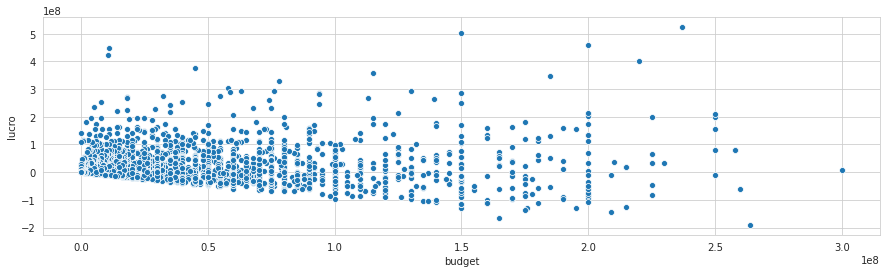

In [103]:
budget_gross = imdb_usa[["budget", "gross"]].dropna().query("budget >0 | gross > 0")

imdb_usa['lucro'] = imdb_usa['gross'] - imdb_usa['budget']

budget_gross = imdb_usa.query("budget >0 | gross > 0")[["budget", "lucro"]].dropna()
plt.figure(figsize=(15,4))

sns.scatterplot(x="budget", y="lucro", data = budget_gross)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


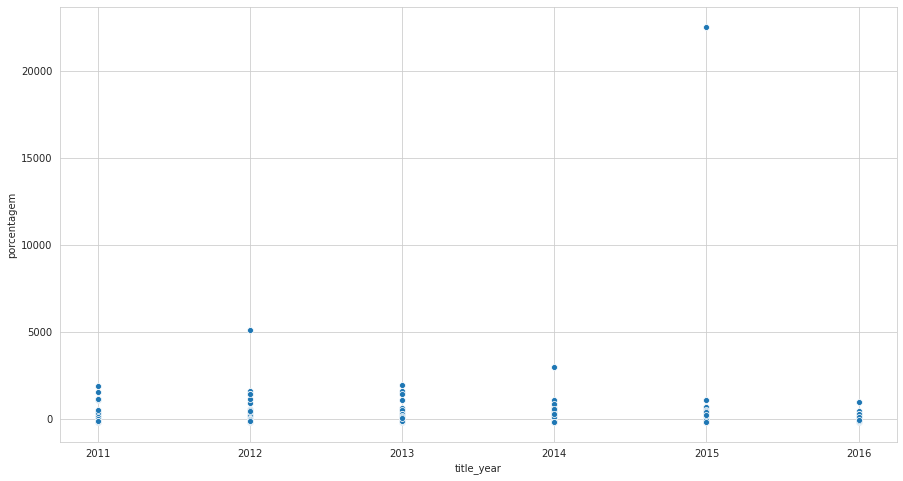

In [108]:
imdb_usa_lucro_prejuizo = imdb_usa.query("budget  >0 and gross > 0 and title_year >2010")
imdb_usa_lucro_prejuizo['porcentagem'] = ((imdb_usa_lucro_prejuizo['lucro']*100)/imdb_usa_lucro_prejuizo['budget'])-100
imdb_usa_lucro_prejuizo = imdb_usa_lucro_prejuizo.sort_values('title_year', ascending=False)[['title_year','movie_title','budget','lucro','porcentagem']]

plt.figure(figsize=(15, 8))
sns.scatterplot(x="title_year", y="porcentagem", data = imdb_usa_lucro_prejuizo)

In [114]:
imdb_usa_lucro_prejuizo.groupby('title_year')['porcentagem'].mean()

title_year
2011.0    -15.177520
2012.0     51.360447
2013.0     22.680385
2014.0     31.766909
2015.0    194.132873
2016.0    -13.416176
Name: porcentagem, dtype: float64

Não tem relação entre o ano e o faturamento, analizando os ultmos 6 anos